In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pJXyKlMeHAk8qaVYL06g")
project = rf.workspace("rf-projects").project("x-ray-id")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to X-Ray-ID-3 in yolov11:: 100%|██████████| 17872/17872 [00:02<00:00, 7239.03it/s]


In [2]:
!nvidia-smi

Tue Aug 12 05:33:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.4/112.6 GB disk)


In [11]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/X-Ray-ID-3/train/images/1377_png_jpg.rf.7145d793b1cf4a5ce441f02bdf258223.jpg ' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/X-Ray-ID-3/train/images/1377_png_jpg.rf.7145d793b1cf4a5ce441f02bdf258223.jpg: 640x640 1 knife, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 181.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


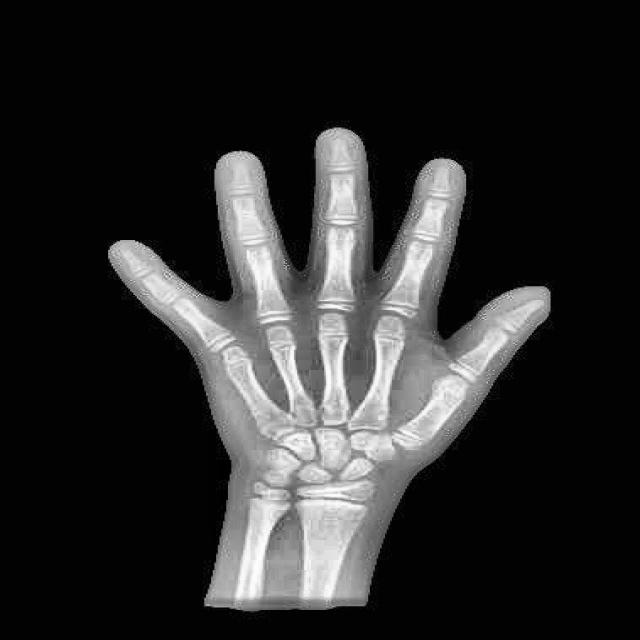

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/X-Ray-ID-3/train/images/1379_png_jpg.rf.2130a8efd4d3fb77df5688500101b5b9.jpg', width=600)

In [14]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open("/content/X-Ray-ID-3/train/images/1381_png_jpg.rf.2c8a365c87caa07517b35cb87a60b223.jpg")
result = model.predict(image, conf=0.25)[0]


0: 640x640 5 toothbrushs, 10.5ms
Speed: 3.4ms preprocess, 10.5ms inference, 155.5ms postprocess per image at shape (1, 3, 640, 640)


In [15]:
result.boxes.xyxy

tensor([[332.8234, 178.6450, 436.4141, 460.4088],
        [242.6107, 175.6871, 307.2918, 436.9629],
        [298.8469, 156.2719, 364.9613, 455.8464],
        [193.0566, 225.4073, 295.1332, 567.3833],
        [303.4407, 284.7631, 510.3513, 560.3052]], device='cuda:0')

In [16]:
result.boxes.conf

tensor([0.7942, 0.7603, 0.7010, 0.5252, 0.3636], device='cuda:0')

In [17]:
result.boxes.cls

tensor([79., 79., 79., 79., 79.], device='cuda:0')

In [18]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

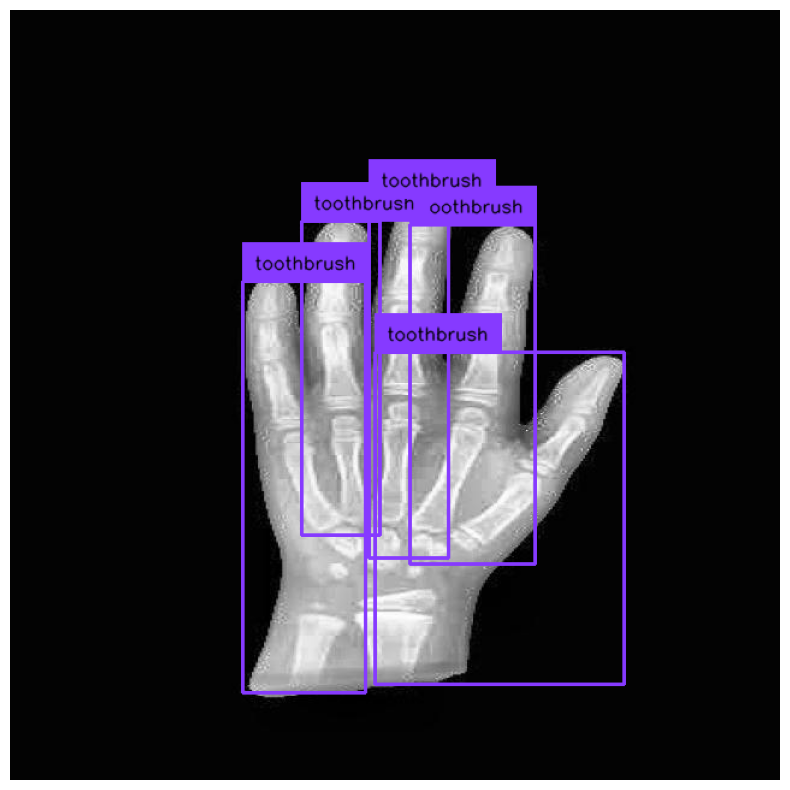

In [19]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [27]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pJXyKlMeHAk8qaVYL06g")
project = rf.workspace("rf-projects").project("x-ray-id")
version = project.version(3)
dataset = version.download("yolov11")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to X-Ray-ID-3 in yolov11:: 100%|██████████| 17872/17872 [00:02<00:00, 7656.95it/s]


In [28]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.177 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/X-Ray-ID-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

In [29]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1754977723.59fae7b44328.5046.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [30]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/X-Ray-ID-3/valid/labels.cache... 387 images, 0 backgrounds, 0 corrupt: 100% 387/387 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/25 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 972, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 638, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    ret

In [31]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/388 /content/datasets/X-Ray-ID-3/test/images/1403_png_jpg.rf.a0dc250fde9bbe158b1a7629af6cdd44.jpg: 640x640 (no detections), 15.6ms
image 2/388 /content/datasets/X-Ray-ID-3/test/images/1406_png_jpg.rf.0a58d107f60cd16126aa3dd3d897f381.jpg: 640x640 1 person, 15.7ms
image 3/388 /content/datasets/X-Ray-ID-3/test/images/1412_png_jpg.rf.8f77fc8198fc248c4da7032bfc1e79a3.jpg: 640x640 1 person, 15.6ms
image 4/388 /content/datasets/X-Ray-ID-3/test/images/1416_png_jpg.rf.42dc3da83740e6f5a0e1a607e9c43f72.jpg: 640x640 1 person, 15.6ms
image 5/388 /content/datasets/X-Ray-ID-3/test/images/1426_png_jpg.rf.d564937a0b5a112b026f3d269fab6787.jpg: 640x640 1 person, 15.6ms
image 6/388 /content/datasets/X-Ray-ID-3/test/images/1432_png_jpg.rf.b34850b533b0b65e9c74d7487a620f6b.jpg: 640x640 1 person, 15.6ms
image 7/388 /content/datasets/X-Ra

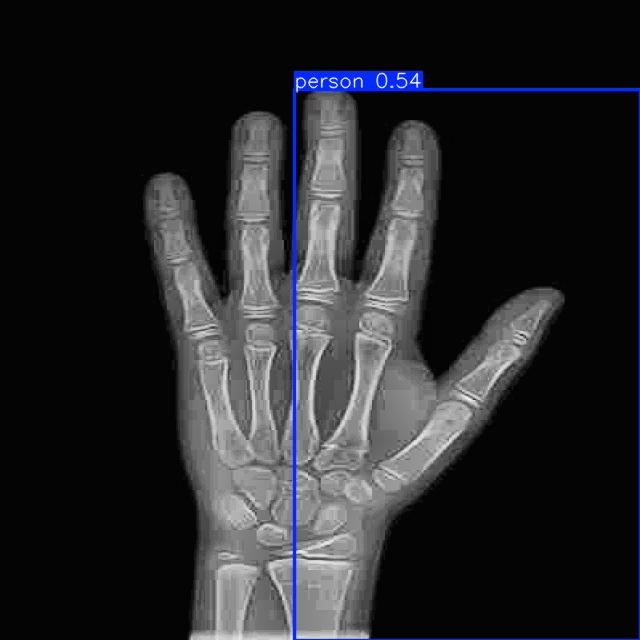

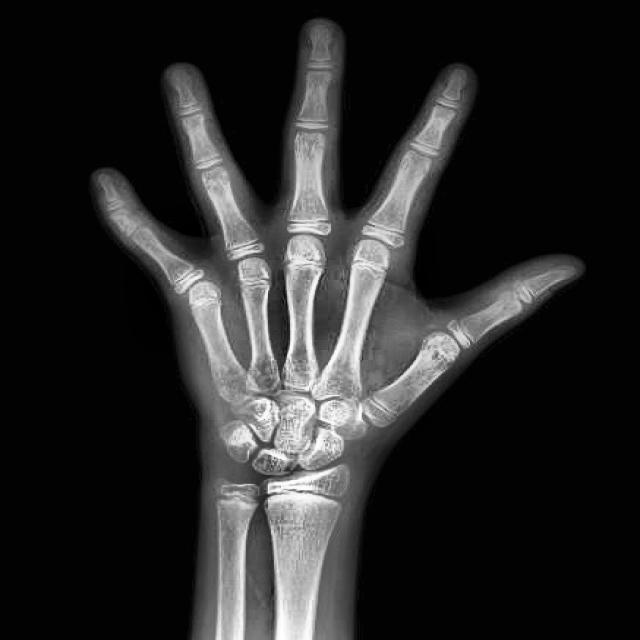

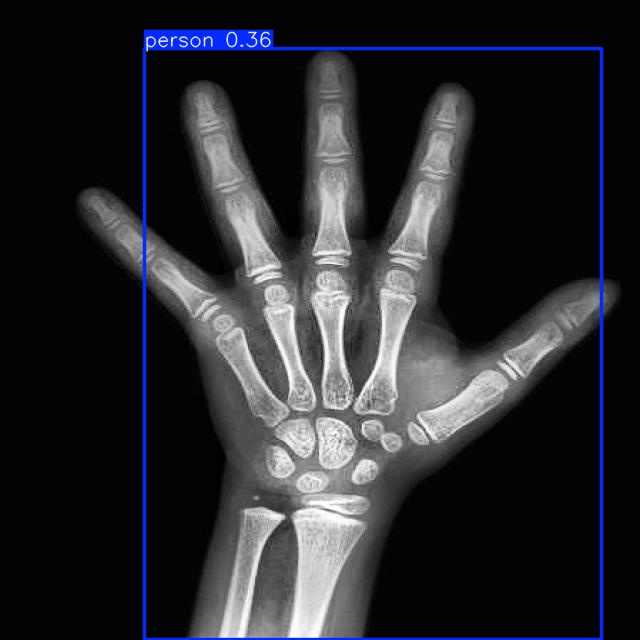

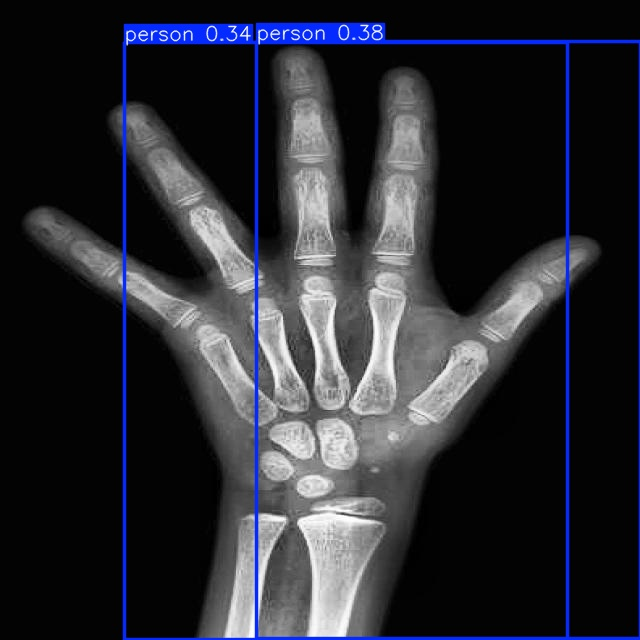

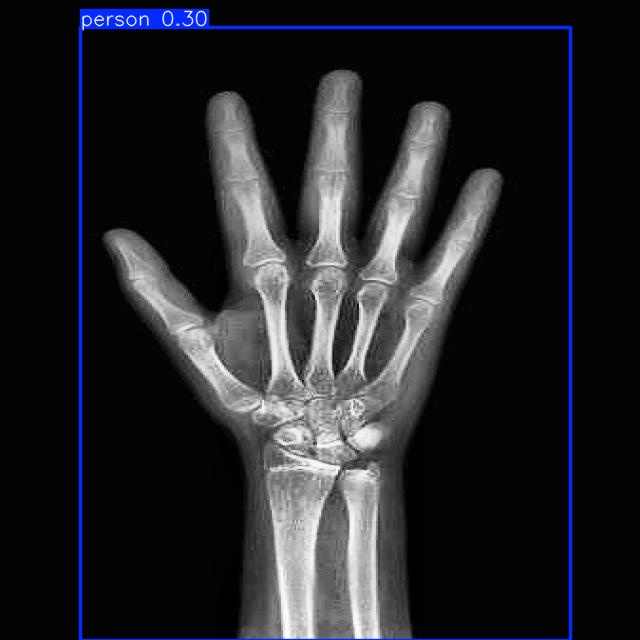

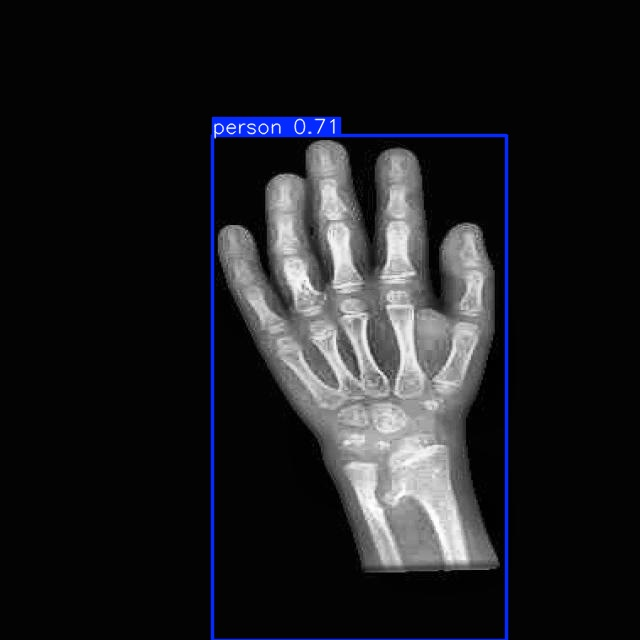

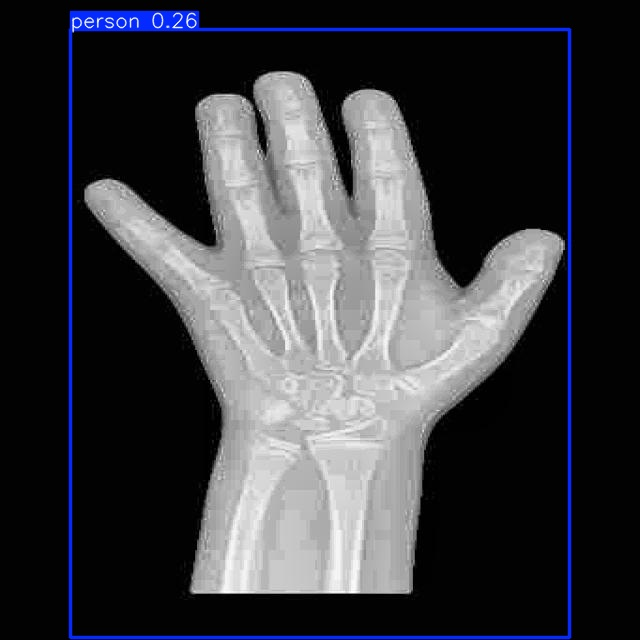

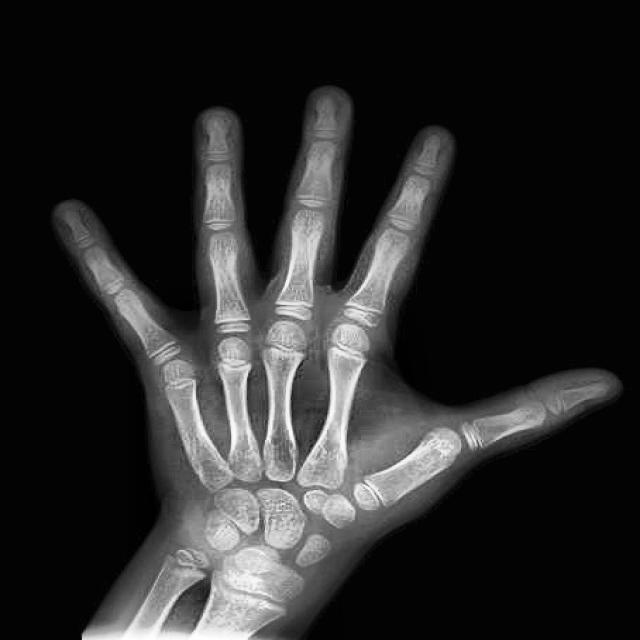

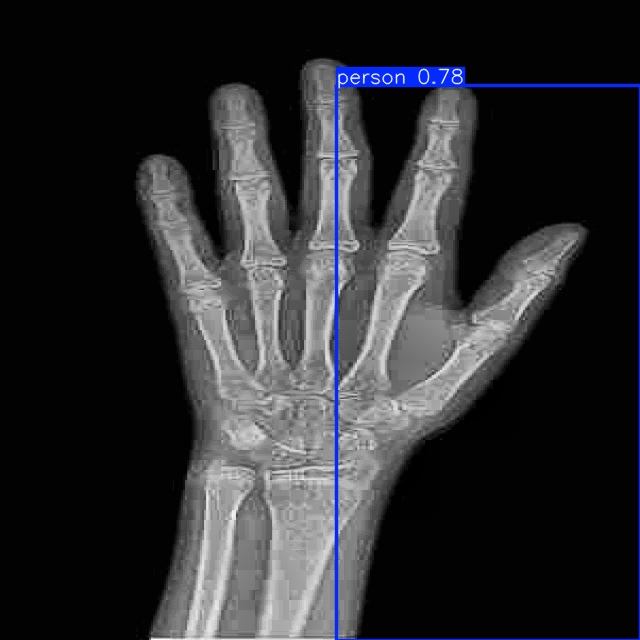

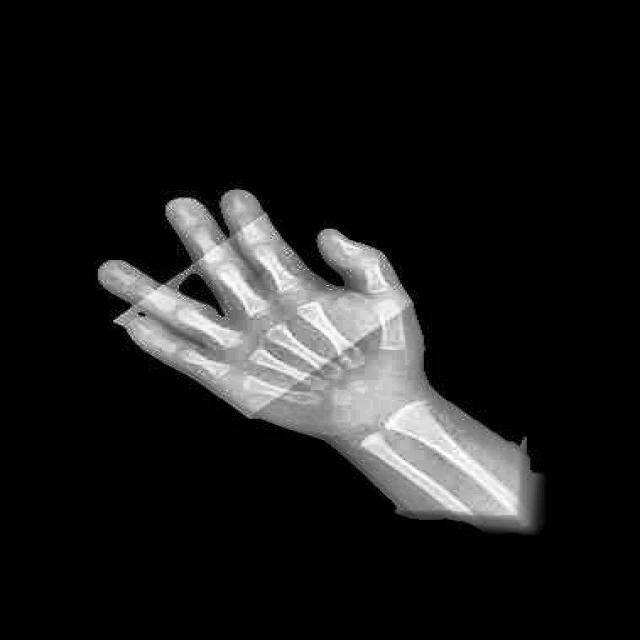

In [32]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")